In [1]:
import pandas as pd
from matplotlib import pyplot as plot
from sklearn.tree import DecisionTreeClassifier #for ML algorithm
from sklearn.model_selection import train_test_split  #for splitting the data sets
from sklearn.metrics import accuracy_score  #for accuracy score of the predictions
from sklearn.externals import joblib

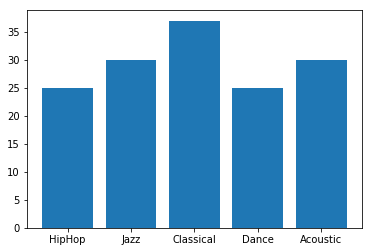

In [2]:
#Step 1: Import the data
music_data = pd.read_csv('music.csv') #read csv file

#Step 2: Clean the data. As there is nothing to clean so proceed to step 3: Split the datasets
#Step 3: Split the datasets
Input = music_data.drop(columns = ['genre']) #drop the columns in the data set
output = music_data['genre']

plot.bar(music_data['genre'], music_data['age'])
plot.show()

Input_train, Input_test, output_train, output_test = train_test_split(Input, output, test_size = 0.2) #returns tuple of the train and test datasets

In [ ]:
#Step 4: Build model using ML Algorithm
model = DecisionTreeClassifier()
#Step 5: Train the model
model.fit(Input_train, output_train)

In [ ]:
# Persisting the model to not create model again and again
joblib.dump(model, 'music-recommender-model.joblib')

In [4]:
#Step 6: Make the prediction
predictions = model.predict(Input_test)

#Check the accuracy
accuracy_score(output_test, predictions)

1.0

In [4]:
# Loading the model from a file
persist_model = joblib.load('music-recommender-model.joblib')

persist_model.predict([[22, 1], [23, 0]])

array(['HipHop', 'Dance'], dtype=object)

In [5]:
from sklearn import tree #to check decision tree

tree.export_graphviz(persist_model, out_file='music-recommender.dot',
                     feature_names=['age', 'gender'],
                     class_names=sorted(output.unique()),
                     label='all',
                     rounded=True,
                     filled=True)

print('Open the output file: music-recommender.dot in graphviz!')

Open the output file: music-recommender.dot in graphviz!
